# Clustering con DBScan sobre el dataset de IRIS

Vamos a ilustrar el funcionamiento del algoritmo **DBScan** para encontrar clusters sobre un dataset muy familiar, de 150 instancias de flores **IRIS**.
Esta técnica se basa en el agrupamiento de los puntos (instancias), basándose en su densidad en el espacio de representación dado por las variables.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Cargar los datos

In [3]:
iris = datasets.load_iris()
X = iris.data; 
data = pd.DataFrame(X)
data.columns = iris.feature_names

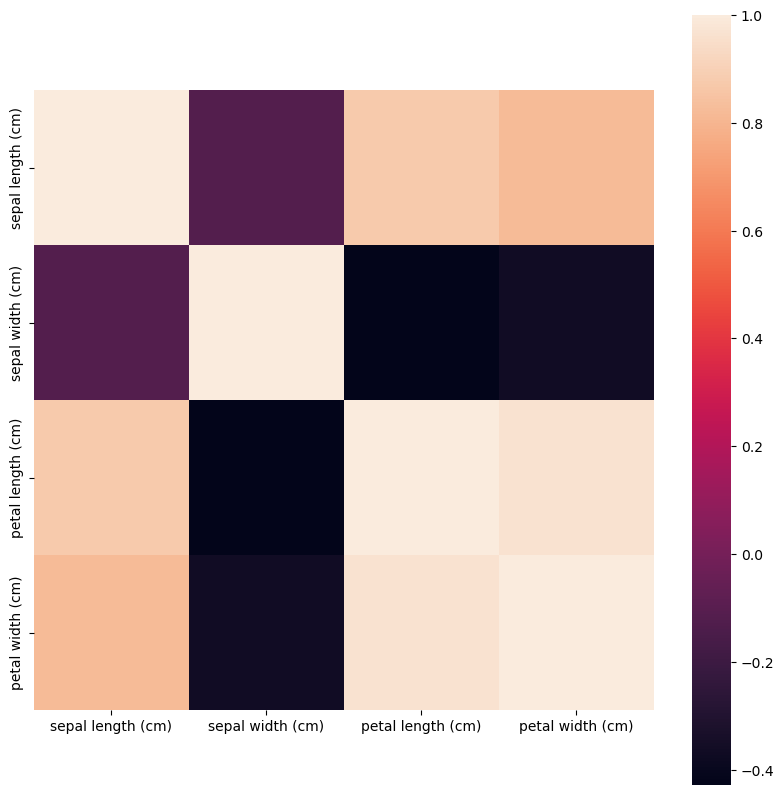

In [4]:
cor = data.corr()
fig = plt.figure(figsize=(10,10))
sns.heatmap(cor, square = True); plt.show()

Como el método de clustering está basado en distancias, es necesario normalizar los datos. 
Vamos entonces a estandarizar el dataset.

In [5]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Ahora que los datos ya están listos, podemos lanzar el proceso de clustering a partir de **DBSCan**. Los parámetros de esta función son:
- **eps**: define la distancia que define la vecindad de cada instancia (valor por defecto 0.5)
- **min_samples**: define el número de instancias que deben estar en la vecindad de un punto para ser considerado como punto **core** (valor por defecto 5)
- **metric**: tipo de distancia a utilizar (valor por defecto 'euclidean')

In [6]:
min_points = 5
eps = 0.7

In [7]:
modelo = DBSCAN(min_samples = min_points, eps=eps) # Utilizamos el valor por defecto de eps=0.5
modelo.fit(X_std)
modelo

DBSCAN(eps=0.7)

El modelo nos permite analizar un conjunto de datos para obtener sus clusters correspondientes.

In [8]:
clusters = pd.DataFrame(modelo.fit_predict(X_std))
data['Cluster'] = clusters
num_clusters = len(set(modelo.labels_))-1
num_clusters

2

Los puntos ruido quedan agrupados en un cluster con indice -1.
Veamos como están repartidos los puntos en los clusters encontrados.

In [9]:
data.Cluster.value_counts()

Cluster
 1    96
 0    48
-1     6
Name: count, dtype: int64

<Axes: xlabel='Cluster'>

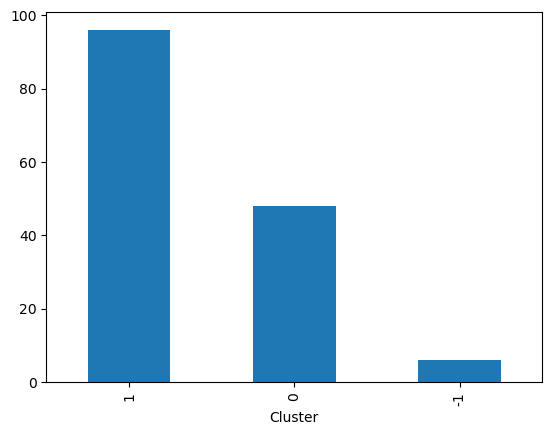

In [10]:
data.Cluster.value_counts().plot.bar()

Encontramos 2 clusters, con 6 puntos que fueron categorizados como ruido. Vamos a visualizarlos para entender mejor el resultado.

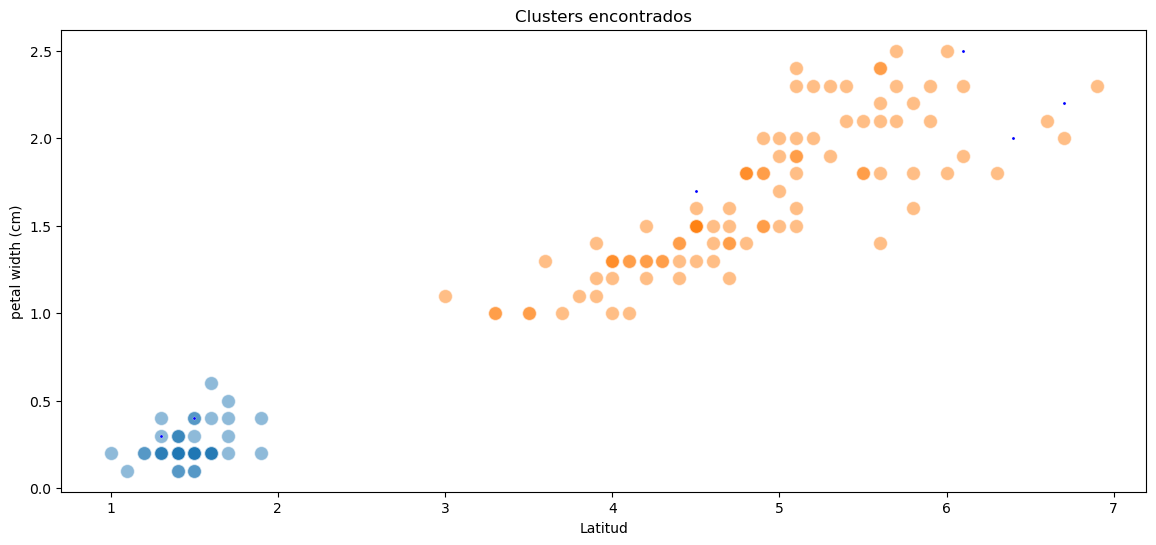

In [11]:
fig, ax = plt.subplots(figsize=(14,6))


for cluster in range(0,num_clusters):
    sns.scatterplot(x="petal length (cm)", y="petal width (cm)", s=100, alpha=0.5,
                    data=data.loc[data.Cluster==cluster,:])
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", s=5, color = 'b',
                    data=data.loc[data.Cluster==-1,:])
ax.set_title('Clusters encontrados')
ax.set_xlabel('Longitude')
ax.set_xlabel('Latitud')
_=plt.show()

## Estimación del mejor valor para **eps**, dado un valor de **min_points** (en este caso, de 5)

Para encontrar el mejor valor de distancia dado el número de vecinos necesarios para ser considerado como punto núcleo, nos vamos a valer de K-NN.

In [12]:
knn = NearestNeighbors(n_neighbors=min_points+1)
knn.fit(X)
knn

NearestNeighbors(n_neighbors=6)

A partir del modelo K-NN, también se pueden obtener los K vecinos más cercanos para cada punto. Tenemos la lista de las distancias y de los IDs de los K vecinos más cercanos para cada punto.

In [13]:
distancias, indices = knn.kneighbors(X)

In [14]:
distancias[0:5]

array([[0.        , 0.1       , 0.14142136, 0.14142136, 0.14142136,
        0.14142136],
       [0.        , 0.14142136, 0.14142136, 0.14142136, 0.17320508,
        0.2236068 ],
       [0.        , 0.14142136, 0.24494897, 0.26457513, 0.26457513,
        0.26457513],
       [0.        , 0.14142136, 0.17320508, 0.2236068 , 0.24494897,
        0.26457513],
       [0.        , 0.14142136, 0.14142136, 0.17320508, 0.17320508,
        0.2236068 ]])

In [15]:
indices[0:10]

array([[ 0, 17,  4, 39, 27, 28],
       [ 1, 34, 45, 12,  9, 25],
       [ 2, 47,  3, 45,  6, 12],
       [ 3, 47, 29, 30,  2, 45],
       [ 4, 37,  0, 17, 40,  7],
       [ 5, 18, 10, 48, 44, 46],
       [ 6, 47,  2, 11, 42, 29],
       [ 7, 39, 49,  0, 17, 26],
       [ 8, 38,  3, 42, 13, 47],
       [ 9, 34,  1, 30, 12, 25]])

Vamos ahora a ordenar los puntos por las distancias del min_points-ésimo punto más cercano para cada punto

In [16]:
distancias[0:5:,min_points]

array([0.14142136, 0.2236068 , 0.26457513, 0.26457513, 0.2236068 ])

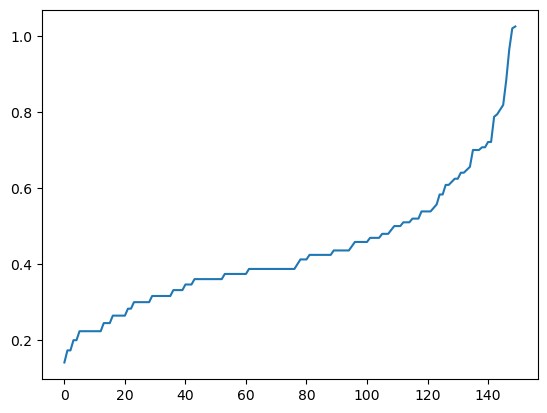

In [17]:
distancias_kesimo = np.sort(distancias[:,min_points], axis=0)
plt.plot(distancias_kesimo)

Vemos que hay un punto de inflexión esta abajo edel valor inicialmente seleccionado de 0.7. Vamos a intentar con 0.45..

In [15]:
min_points = 5
eps = 0.45

In [16]:
modelo = DBSCAN(min_samples = min_points, eps=eps) # Utilizamos el valor por defecto de eps=0.5
modelo.fit(X_std)
clusters = pd.DataFrame(modelo.fit_predict(X_std))
data['Cluster'] = clusters
num_clusters = len(set(modelo.labels_))-1
num_clusters

3

In [20]:
data.Cluster.value_counts()

Cluster
-1    54
 0    41
 1    40
 2    15
Name: count, dtype: int64

<Axes: xlabel='Cluster'>

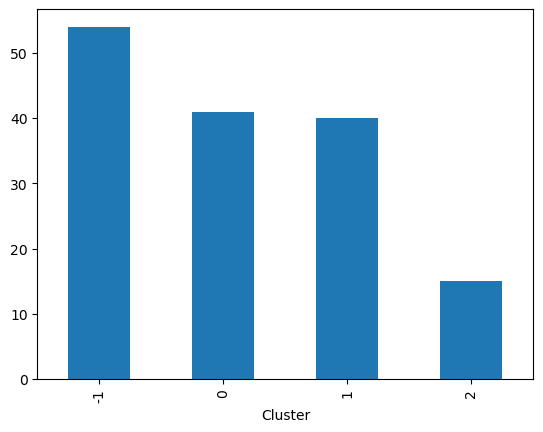

In [21]:
data.Cluster.value_counts().plot.bar()

Encontramos 3 clusters, con 54 puntos que fueron categorizados como ruido. Vamos a visualizarlos para entender mejor el resultado.

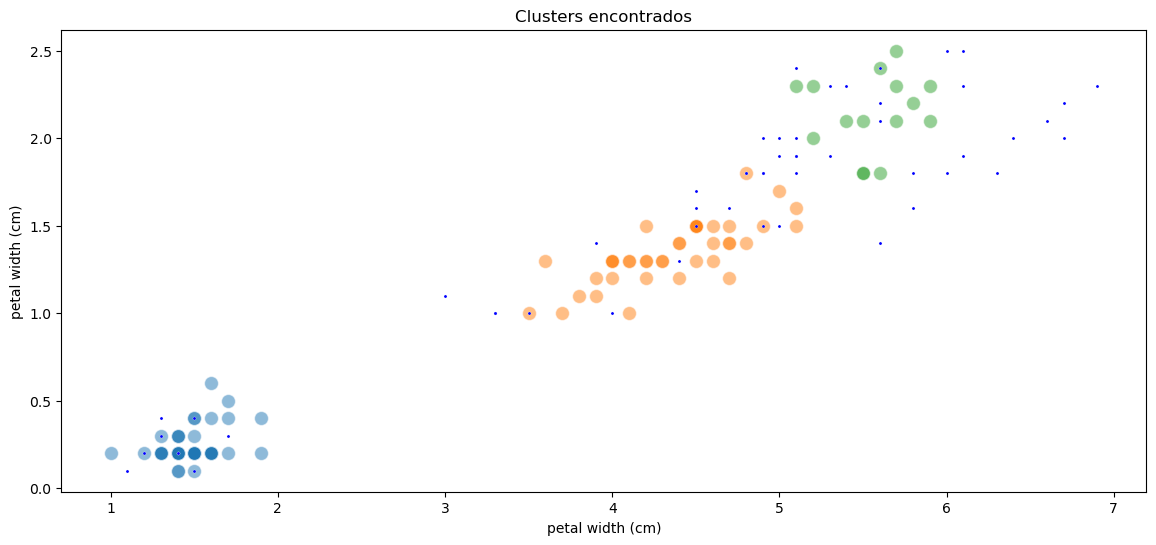

In [17]:
fig, ax = plt.subplots(figsize=(14,6))

for cluster in range(0,num_clusters):
    sns.scatterplot(x="petal length (cm)", y="petal width (cm)", s=100, alpha=0.5,
                    data=data.loc[data.Cluster==cluster,:])
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", s=5, color = 'b',
                    data=data.loc[data.Cluster==-1,:])
ax.set_title('Clusters encontrados')
ax.set_xlabel('petal length (cm)')
ax.set_xlabel('petal width (cm)')
_=plt.show()

Recordemos las clases originales

In [18]:
data['target'] = np.array(iris.target)

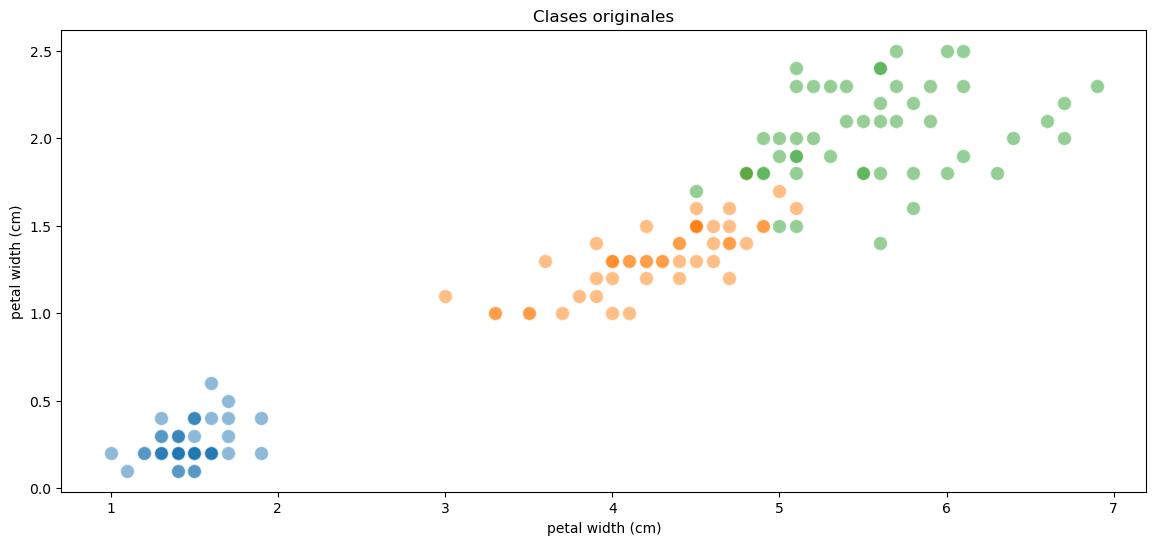

In [19]:
fig, ax = plt.subplots(figsize=(14,6))

for clase in range(0,3):
    sns.scatterplot(x="petal length (cm)", y="petal width (cm)", s=100, alpha=0.5,
                    data=data.loc[data.target==clase,:])
ax.set_title('Clases originales')
ax.set_xlabel('petal length (cm)')
ax.set_xlabel('petal width (cm)')
_=plt.show()

**Ejercicio** Intente hacer que los puntos ruido se conviertan en puntos de uno de los clusters.